In [1]:
import numpy as np
import pandas as pd
import matplotlib as plt
import seaborn as sns

In [2]:
rf_df = pd.read_csv('../data/logged_data.csv')
rf_df = rf_df.dropna(axis=1, how='all')

In [3]:
rf_df.shape

(164160, 26)

In [4]:
rf_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 164160 entries, 0 to 164159
Data columns (total 26 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Timestamp          164160 non-null  object 
 1   Frequency          164160 non-null  int64  
 2   Signal Strength    164160 non-null  int64  
 3   Modulation         164160 non-null  object 
 4   Bandwidth          164160 non-null  int64  
 5   Location           164160 non-null  object 
 6   Device Type        164160 non-null  object 
 7   Antenna Type       164160 non-null  object 
 8   Temperature        164160 non-null  int64  
 9   Humidity           164160 non-null  int64  
 10  Wind Speed         164160 non-null  int64  
 11  Precipitation      164160 non-null  float64
 12  Weather Condition  164160 non-null  object 
 13  Interference Type  122821 non-null  object 
 14  Battery Level      164160 non-null  float64
 15  Power Source       164160 non-null  bool   
 16  CP

In [5]:
null_values = rf_df.isnull().sum()
null_values = null_values[null_values > 0]

In [6]:
null_percent = (null_values / len(rf_df)) * 100
for column, percent in zip(null_percent.index, null_percent):
    print(f"% null values in {column}: {percent}")

% null values in Interference Type: 25.18213937621832
% null values in I/Q Data: 33.40399610136453


In [7]:
rf_df.describe()

,Frequency,Signal Strength,Bandwidth,Temperature,Humidity,Wind Speed,Precipitation,Battery Level,CPU Usage,Memory Usage,WiFi Strength,Disk Usage,System Load,Latitude,Longitude,Altitude(m)
count,1.641600e+05,164160.000000,164160.000000,164160.000000,164160.000000,164160.000000,164160.000000,164160.0,164160.000000,164160.000000,164160.000000,164160.0,164160.000000,1.641600e+05,1.641600e+05,1.641600e+05
mean,1.134665e+08,-49.931609,310092.531676,29.990869,50.085977,9.996851,24.951906,100.0,10.399714,29.404420,-49.861489,18.5,4.619985,2.561268e+01,8.515888e+01,5.946000e+01
std,3.038276e+07,29.189775,347437.723249,6.055765,17.621477,6.050118,14.437653,0.0,28.416891,0.677236,29.199589,0.0,0.143833,1.492144e-12,1.617627e-10,9.617936e-11
min,7.000000e+07,-100.000000,10000.000000,20.000000,20.000000,0.000000,0.000314,100.0,0.000000,28.200000,-100.000000,18.5,4.300781,2.561268e+01,8.515887e+01,5.946000e+01
25%,9.000000e+07,-75.000000,50000.000000,25.000000,35.000000,5.000000,12.375045,100.0,0.000000,28.900000,-75.000000,18.5,4.526367,2.561268e+01,8.515887e+01,5.946000e+01
50%,1.200000e+08,-50.000000,200000.000000,30.000000,50.000000,10.000000,24.930767,100.0,0.000000,29.400000,-50.000000,18.5,4.614746,2.561268e+01,8.515887e+01,5.946000e+01
75%,1.400000e+08,-25.000000,500000.000000,35.000000,65.000000,15.000000,37.449448,100.0,0.000000,30.000000,-25.000000,18.5,4.683594,2.561268e+01,8.515887e+01,5.946000e+01
max,1.600000e+08,0.000000,1000000.000000,40.000000,80.000000,20.000000,49.999882,100.0,100.000000,30.600000,0.000000,18.5,4.956055,2.561268e+01,8.515887e+01,5.946000e+01


In [8]:
median_values = rf_df.median(numeric_only=True)
mode_values = rf_df.mode()
variance_values = rf_df.var(numeric_only=True)
std_dev_values = rf_df.std(numeric_only=True)

In [9]:
# Attempt to gather all signals of the same type into subsets
grouped = rf_df.groupby(['Frequency', 'Modulation', 'Bandwidth', 'Device Type', 'Antenna Type'])
subsets = {}

for name, group in grouped:
    subsets[name] = group

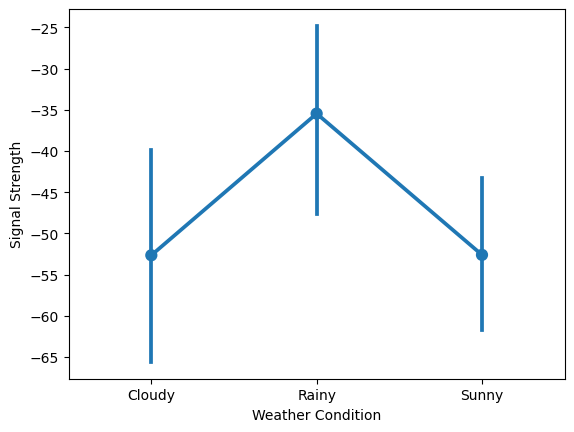

In [14]:
sub_1 = subsets[list(subsets.keys())[0]]
sns.pointplot(x='Weather Condition', y='Signal Strength', data=sub_1);

<Axes: xlabel='Weather Condition', ylabel='Signal Strength'>

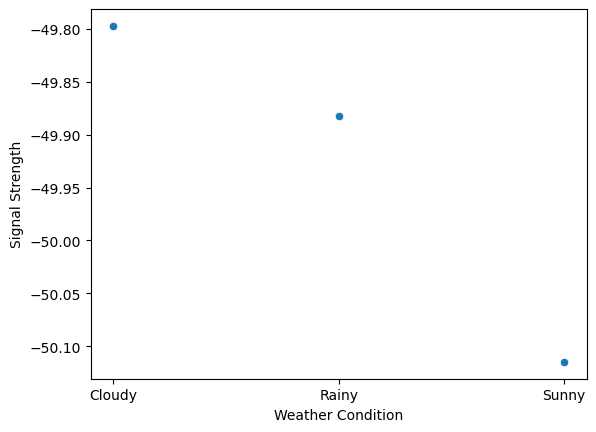

In [18]:
# Get average signal strength per subset for each weather condition
average_sig_strength_per_weather = rf_df.groupby('Weather Condition')['Signal Strength'].mean().reset_index()
sns.scatterplot(x='Weather Condition', y='Signal Strength', data=average_sig_strength_per_weather, legend='auto')

In [ ]:
# The findings in the block above do not line up with the laws of physics and signal theory.
# The average signal strength should be best when it is sunny and worst when it is rainy.
# I suspect that this dataset is generated and is not real 
# OR that the data is not of a high enough quality to justify continuing.